# **Oficina - Prodemge**
## **Pandas**


---



# **Análise de Dados Abertos de Acidentes de Trânsito em Rodovias Federais**


**Objetivo:**
- Analisar os dados de acidentes relacionados às rodovias federais brasileiras;
- Identificar aspesctos, características e localidades e seus respectivos fatores de acidentes.

---




## **Polícia Rodoviária Federal - Banco de Dados de Dados: Acidentes de Trânsito**

### **Acidentes - Polícia Rodoviária Federal - Ano: 2019**
Site com dados abertos:
https://portal.prf.gov.br/dados-abertos-acidentes.

---

**Variáveis (Colunas):**
- data: data da ocorrência
- dia_semana: dia da semana (seg, ter, etc)
- horario: horário da ocorrência
- hora_ajustada: horário da ocorrência ajustado
- hora: hora da ocorrência (apenas número inteiro)
- uf: unidade federa
- br: nome da rodovia
- km: km de ocorrência
- municipio: município
- causa_acidente: causa do acidente
- tipo_acidente: tipo do acidente
- classificacao_acidente: classificação do acidente
- fase_dia: fase do dia (manhã, noite, etc)
- condicao_metereologica: condição climática
- tipo_pista: tipo de pista (simple, dupla, etc)
- tracado_via: traçado da rodovia (reta, curva, etc)
- uso_solo: áre urbana ou rural
- pessoas: número de pessoas envolvidas no acidente
- mortos: número de mortes registrada
- feridos_leves: número de feridos (estado leve)
- feridos_graves: números de feridos (estado grave)
- ilesos: número de ilesos
- ignorados
- feridos: número total de feridos
- veiculos: número de veículos envolvidos o acidente
- latitude: latitude (graus decimais)
- longitude: longitude (graus decimais)

---

#### **Explicação de cada campo do dataset**
https://arquivos.prf.gov.br/arquivos/index.php/s/9JIz6yPXT71l9Gf#pdfviewer

---

#### **Link para download do dataset Original**
http://arquivos.prf.gov.br/arquivos/index.php/s/kRBUylqz6DyQznN/download


---

#### **Atenção**
O banco de dados original foi pré-tratado e adaptado para apresentação nesta Oficina.

---



# **Pandas**

Pandas é uma biblioteca de software criada para a linguagem Python para manipulação e análise de dados.

**"É o Excel dentro do Python"**

---




# **Pandas: Importação da Biblioteca e Comandos básicos**

Para utilizar o Pandas devemos fazer a importação da biblioteca no Python.

**Para simplificar a chamada do Pandas, ele é referenciado como "pd".**

---




In [151]:
# Importando a Biblioteca Pandas no Python
import pandas as pd

In [152]:
# Abrindo o arquivo que contém os dados de acidentes registrados em rodovias federais no ano de 2019
## O arquivo original encontra-se na Web, ele deverá ser baixado e depoisi importado para a plataforma Google Colaboratory
#http://arquivos.prf.gov.br/arquivos/index.php/s/kRBUylqz6DyQznN/download

### O próximo passo é efetuar a leitura/carregamento do arquivo pelo Pandas
# Normalmente utilizamos o termo "df" para nomear o arquivo que receberá o resultado da operação de leitura dos dados, em referência DataFrame(df):
df = pd.read_excel('/2019_acidentes_rodovias_federais_2.xlsx')




---


# **Mãos à Obra!**


---



**Conhecendo a Base de Dados de Acidentes de Trânsito em Rodovias Federais**

---




## **1. Conhecendo e Preparando os Dados**

**Visualizando os Dados**

---




In [153]:
# Visualizando as 5 primeiras linhas do banco de dados.
df.head()

,data,dia_semana,horario,hora_ajustada,hora,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude
0,2019-01-01,terça-feira,01:30:00,02:00:00,2,SP,116.0,218.0,GUARULHOS,Falta de Atenção à Condução,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Céu Claro,Múltipla,Curva,Sim,4,0,4,0,0,0,4,1,-23.46052,-46.487725
1,2019-01-01,terça-feira,01:30:00,02:00:00,2,PR,373.0,177.3,PONTA GROSSA,Falta de Atenção à Condução,Colisão traseira,Com Vítimas Feridas,Plena Noite,Nublado,Dupla,Reta,Sim,1,0,1,0,0,0,1,1,-25.05534,-50.227768
2,2019-01-01,terça-feira,00:45:00,01:00:00,1,SC,101.0,16.0,GARUVA,Animais na Pista,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Céu Claro,Dupla,Reta,Sim,1,0,1,0,0,0,1,1,-26.12160,-48.882600
3,2019-01-01,terça-feira,00:00:00,00:00:00,0,CE,20.0,429.5,FORTALEZA,Ingestão de Substâncias Psicoativas,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Nublado,Dupla,Viaduto,Sim,1,0,0,1,0,0,1,1,-3.76999,-38.670063
4,2019-01-01,terça-feira,01:00:00,01:00:00,1,MG,381.0,327.0,NOVA ERA,Falta de Atenção à Condução,Colisão transversal,Com Vítimas Feridas,Plena Noite,Nublado,Simples,Interseção de vias,Não,2,0,0,1,1,0,1,2,-19.76090,-43.030600


In [154]:
# Listando os nomes das colunas do nosso banco de dados
df.columns

Index(['data', 'dia_semana', 'horario', 'hora_ajustada', 'hora', 'uf', 'br',
       'km', 'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'condicao_metereologica',
       'tipo_pista', 'tracado_via', 'uso_solo', 'pessoas', 'mortos',
       'feridos_leves', 'feridos_graves', 'ilesos', 'ignorados', 'feridos',
       'veiculos', 'latitude', 'longitude'],
      dtype='object')

In [155]:
# Para verificar o tamanho da banco de dados de forma direta, podemos utilizar a propriedade SHAPE, no caso há 67.446 registros e 27 colunas
df.shape

(67446, 27)

In [156]:
# Listando todas as colunas (campos) do banco de dados e suas respectivas tipologias.
## O banco de dados em análise dispõe de 27 colunas, e 67.446 registros de ocorrências acidentes de trânsito em rodovias federais.
## Há dados do tipo object datetime (data), object (String), int64 (inteiro) e float64 (real, float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67446 entries, 0 to 67445
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   data                    67446 non-null  datetime64[ns]
 1   dia_semana              67446 non-null  object        
 2   horario                 67446 non-null  object        
 3   hora_ajustada           67446 non-null  object        
 4   hora                    67446 non-null  int64         
 5   uf                      67446 non-null  object        
 6   br                      67351 non-null  float64       
 7   km                      67351 non-null  float64       
 8   municipio               67446 non-null  object        
 9   causa_acidente          67446 non-null  object        
 10  tipo_acidente           67446 non-null  object        
 11  classificacao_acidente  67446 non-null  object        
 12  fase_dia                67446 non-null  object

**Tratando Valores Nulos**

---




In [157]:
# Verificando a existência de valore Nulos na base de dados.
# O comando isnull() faz a verificação de valores nulos em cada coluna, o comando sum() efetua a soma da ocorrência de valores nulos em cada coluna.
df.isnull().sum()

data                       0
dia_semana                 0
horario                    0
hora_ajustada              0
hora                       0
uf                         0
br                        95
km                        95
municipio                  0
causa_acidente             0
tipo_acidente              0
classificacao_acidente     0
fase_dia                   0
condicao_metereologica     0
tipo_pista                 0
tracado_via                0
uso_solo                   0
pessoas                    0
mortos                     0
feridos_leves              0
feridos_graves             0
ilesos                     0
ignorados                  0
feridos                    0
veiculos                   0
latitude                   0
longitude                  0
dtype: int64

In [158]:
# Apenas os campos 'uf' e 'km' apresentaram valores nulos, como eles não serão utilizados em nossas análises, vamos tratá-los agora.
# Valores nulos nas colunas br e km receberam o valor "Nao_Informado"
df["br"].fillna("Nao_Informado", inplace = True) 
df["km"].fillna("Nao_Informado", inplace = True)
df.isnull().sum()
# Agora nosso banco de dados não tem campos com valores nulos

data                      0
dia_semana                0
horario                   0
hora_ajustada             0
hora                      0
uf                        0
br                        0
km                        0
municipio                 0
causa_acidente            0
tipo_acidente             0
classificacao_acidente    0
fase_dia                  0
condicao_metereologica    0
tipo_pista                0
tracado_via               0
uso_solo                  0
pessoas                   0
mortos                    0
feridos_leves             0
feridos_graves            0
ilesos                    0
ignorados                 0
feridos                   0
veiculos                  0
latitude                  0
longitude                 0
dtype: int64

**Inserindo Colunas**

---




In [159]:
# Desmembrando o campo Data em campos separados: dia, mês e ano.
# Removendo formato/dados de horas (00:00:00) do campo data
df['data'] = pd.to_datetime(df['data']).dt.normalize()

# Criando novas colunas (dia, mes, ano) que receber dados particionados do campo Data:
df['dia'] = df['data'].dt.day
df['mes'] = df['data'].dt.month
df['ano'] = df['data'].dt.year

#Visualizando os resultados
df.head()

,data,dia_semana,horario,hora_ajustada,hora,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,dia,mes,ano
0,2019-01-01,terça-feira,01:30:00,02:00:00,2,SP,116,218,GUARULHOS,Falta de Atenção à Condução,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Céu Claro,Múltipla,Curva,Sim,4,0,4,0,0,0,4,1,-23.46052,-46.487725,1,1,2019
1,2019-01-01,terça-feira,01:30:00,02:00:00,2,PR,373,177.3,PONTA GROSSA,Falta de Atenção à Condução,Colisão traseira,Com Vítimas Feridas,Plena Noite,Nublado,Dupla,Reta,Sim,1,0,1,0,0,0,1,1,-25.05534,-50.227768,1,1,2019
2,2019-01-01,terça-feira,00:45:00,01:00:00,1,SC,101,16,GARUVA,Animais na Pista,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Céu Claro,Dupla,Reta,Sim,1,0,1,0,0,0,1,1,-26.12160,-48.882600,1,1,2019
3,2019-01-01,terça-feira,00:00:00,00:00:00,0,CE,20,429.5,FORTALEZA,Ingestão de Substâncias Psicoativas,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Nublado,Dupla,Viaduto,Sim,1,0,0,1,0,0,1,1,-3.76999,-38.670063,1,1,2019
4,2019-01-01,terça-feira,01:00:00,01:00:00,1,MG,381,327,NOVA ERA,Falta de Atenção à Condução,Colisão transversal,Com Vítimas Feridas,Plena Noite,Nublado,Simples,Interseção de vias,Não,2,0,0,1,1,0,1,2,-19.76090,-43.030600,1,1,2019


**Removendo Colunas**

---




In [160]:
# Excluindo colunas do banco de dados
# Não iremos utilizar todas as colunas da nossa base de dados, iremos excluir as colunas: data, horario, hora_ajustada e km.

# Excluindo uma coluna
df.drop('data', axis=1, inplace=True)

# Excluindo diversas colunas simultaneamente
## Filtro com a lista das tabelas a 
filtro_excluir = ['horario', 'hora_ajustada', 'km']

df.drop(df[filtro_excluir], axis=1, inplace=True)

In [161]:
# Listando os nomes das colunas do nosso banco de dados como a nova estrutura
df.columns

Index(['dia_semana', 'hora', 'uf', 'br', 'municipio', 'causa_acidente',
       'tipo_acidente', 'classificacao_acidente', 'fase_dia',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'dia',
       'mes', 'ano'],
      dtype='object')

In [162]:
# Visualizando as primeiras linhas da base de dados com a nova estrutura
df.head()

,dia_semana,hora,uf,br,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,dia,mes,ano
0,terça-feira,2,SP,116,GUARULHOS,Falta de Atenção à Condução,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Céu Claro,Múltipla,Curva,Sim,4,0,4,0,0,0,4,1,-23.46052,-46.487725,1,1,2019
1,terça-feira,2,PR,373,PONTA GROSSA,Falta de Atenção à Condução,Colisão traseira,Com Vítimas Feridas,Plena Noite,Nublado,Dupla,Reta,Sim,1,0,1,0,0,0,1,1,-25.05534,-50.227768,1,1,2019
2,terça-feira,1,SC,101,GARUVA,Animais na Pista,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Céu Claro,Dupla,Reta,Sim,1,0,1,0,0,0,1,1,-26.12160,-48.882600,1,1,2019
3,terça-feira,0,CE,20,FORTALEZA,Ingestão de Substâncias Psicoativas,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Nublado,Dupla,Viaduto,Sim,1,0,0,1,0,0,1,1,-3.76999,-38.670063,1,1,2019
4,terça-feira,1,MG,381,NOVA ERA,Falta de Atenção à Condução,Colisão transversal,Com Vítimas Feridas,Plena Noite,Nublado,Simples,Interseção de vias,Não,2,0,0,1,1,0,1,2,-19.76090,-43.030600,1,1,2019


**Renomeando Colunas**

---





In [170]:
# Renomeando o nome de uma coluna, caso trocaremos o nome da coluna "uf" para "UF" (há diferença entre letras maiúsculas e minúsculas)
# Devemos informar o eixo das colunas (axis=1) e inplace=True para gravar as informações na base dados
df.rename({"uf": "UF"}, axis=1, inplace=True)

# Visualizando o resultado, exibição das colunas e das duas primeiras linhas da base dados
df.head(2)

,dia_semana,hora,UF,br,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,dia,mes,ano
0,terça-feira,2,SP,116,GUARULHOS,Falta de Atenção à Condução,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Céu Claro,Múltipla,Curva,Sim,4,0,4,0,0,0,4,1,-23.46052,-46.487725,1,1,2019
1,terça-feira,2,PR,373,PONTA GROSSA,Falta de Atenção à Condução,Colisão traseira,Com Vítimas Feridas,Plena Noite,Nublado,Dupla,Reta,Sim,1,0,1,0,0,0,1,1,-25.05534,-50.227768,1,1,2019


**Estatística Básica dos Campos Numéricos**

---




In [163]:
# Conhecendo as características estatísticas da base de dados
# O comando describe() fornece as caraterísticas estatíticas básicas dos campos numéricos do banco de dados
# São apresentados: 
# - número de registros (count)
# - média (mean)
# - desvio padrão (std)
# - mínimo (min)
# - 25% (valor atingido por 25% dos dados)
# - 50% (mediana, valor atingido por 50% dos dados)
# - 75% (valor atingido por 75% dos dados)
# - máximo (max)
df.describe()

,hora,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,dia,mes,ano
count,67446.000000,67446.000000,67446.000000,67446.000000,67446.000000,67446.000000,67446.000000,67446.000000,67446.000000,67446.000000,67446.000000,67446.000000,67446.000000,67446.0
mean,13.149735,2.405969,0.079071,0.897014,0.275376,1.017614,0.136895,1.172390,1.661344,-18.900023,-46.537000,15.625330,6.684577,2019.0
std,6.143623,1.979497,0.322652,1.136673,0.625602,1.506529,0.405994,1.268847,0.726134,7.764030,6.194887,8.742027,3.440561,0.0
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-33.689820,-70.345630,1.000000,1.000000,2019.0
25%,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-25.384677,-50.085615,8.000000,4.000000,2019.0
50%,14.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,-20.391790,-47.717350,16.000000,7.000000,2019.0
75%,18.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,-12.786050,-42.349310,23.000000,10.000000,2019.0
max,23.000000,74.000000,7.000000,43.000000,22.000000,62.000000,10.000000,49.000000,14.000000,4.460678,-34.814990,31.000000,12.000000,2019.0


**Selecionando Colunas e Filtrando Dados**

---




In [164]:
# Selecionando dados de uma única coluna
df['feridos_graves']
# vc também pode utilizar o íncide da coluna, o resultado será o mesmo: df.iloc[:,16]
# Onde ":" representa todas as linhas e "16" a posição da coluna de interesse
#df.iloc[:,16]

0        0
1        0
2        0
3        1
4        1
        ..
67441    1
67442    0
67443    1
67444    1
67445    0
Name: feridos_graves, Length: 67446, dtype: int64

In [165]:
# Selecionando duas ou mais colunas
df[['tipo_acidente', 'classificacao_acidente']]

,tipo_acidente,classificacao_acidente
0,Colisão com objeto estático,Com Vítimas Feridas
1,Colisão traseira,Com Vítimas Feridas
2,Colisão com objeto estático,Com Vítimas Feridas
3,Colisão com objeto estático,Com Vítimas Feridas
4,Colisão transversal,Com Vítimas Feridas
...,...,...
67441,Tombamento,Com Vítimas Feridas
67442,Colisão lateral,Com Vítimas Feridas
67443,Colisão traseira,Com Vítimas Feridas
67444,Saída de leito carroçável,Com Vítimas Feridas


In [166]:
# Verificando os itens diferentes que existem em determinado campo
df['tipo_acidente'].unique()

array(['Colisão com objeto estático', 'Colisão traseira',
       'Colisão transversal', 'Saída de leito carroçável',
       'Atropelamento de Animal', 'Atropelamento de Pedestre',
       'Colisão frontal', 'Colisão lateral',
       'Queda de ocupante de veículo', 'Incêndio', 'Capotamento',
       'Engavetamento', 'Tombamento', 'Derramamento de carga',
       'Colisão com objeto em movimento', 'Danos eventuais'], dtype=object)

In [167]:
# Contando quantos itens diferentes existem em determinado campo, no caso são 16 itens distintos
df['tipo_acidente'].nunique()

16

In [168]:
# Condicional simples: uso_solo = 'Sim' (Acidente ocorreu em Área Urbana)
## Exibe a lista
df[(df['uso_solo']=='Sim')]

## Mostra quantos valores atendem à condição e exibe a base daddos simultaneamente
#df[(df['uso_solo']=='Sim')].value_counts()

,dia_semana,hora,uf,br,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,dia,mes,ano
0,terça-feira,2,SP,116,GUARULHOS,Falta de Atenção à Condução,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Céu Claro,Múltipla,Curva,Sim,4,0,4,0,0,0,4,1,-23.460520,-46.487725,1,1,2019
1,terça-feira,2,PR,373,PONTA GROSSA,Falta de Atenção à Condução,Colisão traseira,Com Vítimas Feridas,Plena Noite,Nublado,Dupla,Reta,Sim,1,0,1,0,0,0,1,1,-25.055340,-50.227768,1,1,2019
2,terça-feira,1,SC,101,GARUVA,Animais na Pista,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Céu Claro,Dupla,Reta,Sim,1,0,1,0,0,0,1,1,-26.121600,-48.882600,1,1,2019
3,terça-feira,0,CE,20,FORTALEZA,Ingestão de Substâncias Psicoativas,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Nublado,Dupla,Viaduto,Sim,1,0,0,1,0,0,1,1,-3.769990,-38.670063,1,1,2019
5,terça-feira,2,SC,470,GASPAR,Ingestão de Substâncias Psicoativas,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Céu Claro,Simples,Reta,Sim,1,0,1,0,0,0,1,1,-26.875719,-49.003746,1,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67437,quarta-feira,10,SC,282,PINHALZINHO,Falta de Atenção à Condução,Colisão frontal,Com Vítimas Feridas,Pleno dia,Sol,Simples,Reta,Sim,5,0,5,0,0,0,5,2,-26.835440,-52.990580,25,12,2019
67439,terça-feira,5,AC,364,RIO BRANCO,Defeito na Via,Queda de ocupante de veículo,Com Vítimas Feridas,Amanhecer,Ignorado,Dupla,Reta,Sim,1,0,0,1,0,0,1,1,-10.013160,-67.713780,15,1,2019
67441,segunda-feira,9,ES,101,SERRA,Falta de Atenção à Condução,Tombamento,Com Vítimas Feridas,Pleno dia,Céu Claro,Dupla,Reta,Sim,2,0,0,1,1,0,1,2,-20.231070,-40.273870,7,10,2019
67442,segunda-feira,7,PR,116,FAZENDA RIO GRANDE,Falta de Atenção à Condução,Colisão lateral,Com Vítimas Feridas,Pleno dia,Céu Claro,Dupla,Reta,Sim,3,0,1,0,1,1,1,2,-25.595050,-49.316310,25,11,2019


In [169]:
# Filtrando dados por meio de valores de determinado campo
# Condicional composta: uso_solo = 'Não' (Acidente ocorreu em Área Rural) em um dia de 'Domingo'
df[(df['uso_solo']=='Não') & (df['dia_semana']=='domingo')]

,dia_semana,hora,uf,br,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,dia,mes,ano
805,domingo,1,SP,116,BARRA DO TURVO,Velocidade Incompatível,Colisão traseira,Com Vítimas Feridas,Plena Noite,Chuva,Dupla,Curva,Não,5,0,1,0,4,0,1,2,-24.993697,-48.508244,6,1,2019
810,domingo,2,RJ,356,CAMPOS DOS GOYTACAZES,Não guardar distância de segurança,Colisão traseira,Com Vítimas Feridas,Plena Noite,Céu Claro,Simples,Reta,Não,2,0,1,0,1,0,1,2,-21.777777,-41.306713,6,1,2019
813,domingo,1,MG,116,TEOFILO OTONI,Animais na Pista,Atropelamento de Animal,Com Vítimas Feridas,Plena Noite,Nublado,Simples,Reta,Não,2,0,1,1,0,0,2,1,-17.829760,-41.509094,6,1,2019
814,domingo,1,CE,222,UMIRIM,Não guardar distância de segurança,Colisão lateral,Com Vítimas Feridas,Plena Noite,Céu Claro,Simples,Reta,Não,3,0,0,3,0,0,3,2,-3.674422,-39.250706,6,1,2019
815,domingo,2,MG,116,TEOFILO OTONI,Condutor Dormindo,Colisão lateral,Com Vítimas Fatais,Plena Noite,Céu Claro,Simples,Reta,Não,6,1,4,0,1,0,4,2,-17.803983,-41.497121,6,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67407,domingo,3,RN,101,SAO JOSE DE MIPIBU,Ingestão de Álcool,Colisão traseira,Com Vítimas Feridas,Plena Noite,Céu Claro,Dupla,Reta,Não,5,0,0,3,1,1,3,2,-6.052526,-35.243590,8,12,2019
67409,domingo,16,BA,101,SAO JOSE DA VITORIA,Velocidade Incompatível,Colisão com objeto estático,Com Vítimas Feridas,Pleno dia,Chuva,Simples,Curva,Não,2,0,1,0,1,0,1,1,-15.149390,-39.394320,24,11,2019
67415,domingo,7,BA,324,RIACHAO DO JACUIPE,Animais na Pista,Atropelamento de Animal,Com Vítimas Feridas,Pleno dia,Céu Claro,Simples,Reta,Não,4,0,0,1,3,0,1,1,-11.810080,-39.386390,15,12,2019
67431,domingo,20,AL,316,ATALAIA,Deficiência ou não Acionamento do Sistema de I...,Colisão lateral,Com Vítimas Fatais,Plena Noite,Céu Claro,Simples,Reta,Não,2,1,0,0,0,1,0,2,-9.517871,-35.999890,3,11,2019


In [188]:
# Selecionando dados que contenham determinada palavra em um campo da tabela
# Pra isso, selecionamos todas as ocorrências que contém a palavra 'Colisão Frontal' na coluna de tipo de acidente (tipo_acidente)
tipo = df[df.tipo_acidente.str.contains("Colisão frontal")]
tipo.head()

,dia_semana,hora,UF,br,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,dia,mes,ano
9,terça-feira,2,RS,386,BOA VISTA DAS MISSOES,Ingestão de Álcool,Colisão frontal,Com Vítimas Feridas,Plena Noite,Nublado,Simples,Curva,Sim,4,0,2,2,0,0,4,2,-27.693541,-53.300945,1,1,2019
10,terça-feira,2,MG,50,UBERLANDIA,Desobediência às normas de trânsito pelo condutor,Colisão frontal,Com Vítimas Feridas,Plena Noite,Chuva,Dupla,Interseção de vias,Não,3,0,0,2,1,0,2,2,-18.944400,-48.218500,1,1,2019
11,terça-feira,2,SP,101,UBATUBA,Ingestão de Álcool,Colisão frontal,Com Vítimas Feridas,Plena Noite,Céu Claro,Simples,Reta,Sim,4,0,4,0,0,0,4,2,-23.413320,-45.033131,1,1,2019
16,terça-feira,3,PB,230,CAJAZEIRAS,Falta de Atenção à Condução,Colisão frontal,Com Vítimas Fatais,Plena Noite,Nublado,Simples,Reta,Sim,2,1,1,0,0,0,1,2,-6.899000,-38.515900,1,1,2019
17,terça-feira,4,RN,304,MACAIBA,Desobediência às normas de trânsito pelo condutor,Colisão frontal,Com Vítimas Fatais,Plena Noite,Céu Claro,Simples,Reta,Não,2,1,0,0,1,0,0,2,-5.889564,-35.489544,1,1,2019


## **2. Análise Exploratória dos Dados**

**Causas de Acidentes**

---




In [171]:
# Verificando a quantidade de registros referentes às causas de acidentes de trânsito nas rodovias federais
## Falta de Atenção se destaca amplamente como o principal fator de acidente nas estradas
df['causa_acidente'].value_counts()

Falta de Atenção à Condução                                                       24992
Desobediência às normas de trânsito pelo condutor                                  8098
Velocidade Incompatível                                                            6028
Ingestão de Álcool                                                                 5419
Não guardar distância de segurança                                                 4214
Defeito Mecânico no Veículo                                                        3732
Condutor Dormindo                                                                  2483
Pista Escorregadia                                                                 2186
Falta de Atenção do Pedestre                                                       1971
Animais na Pista                                                                   1527
Ultrapassagem Indevida                                                             1173
Defeito na Via                  

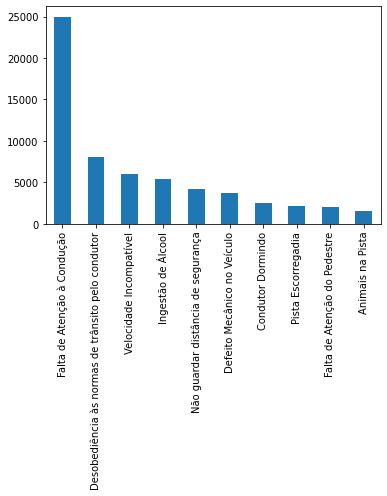

In [172]:
# Exibindo graficamente as 10 principais causas de acidentes de trânsito em rodovias federais
## A função value_counts() efetua o somatório de cada classe que está inserida em determinada coluna
## A delimitação da quantidade de itens a serem é exibidos é determinada pela propriedade .iloc[:10], no serão exibidos os 10 primeiros
incidentes_mais_frequentes = df['causa_acidente'].value_counts().iloc[:10]
incidentes_mais_frequentes.plot.bar()

**Tipos de Acidentes**

---




In [185]:
# Contagem da frequência de cada categoria de acidente em rodovias federais
# Selecao das 10 primeiras categorias utilizando a função value_counts() e a propriedade iloc do objeto df (nosso DataFrame, banco de dados)
# Colisão traseiro é o tipo de acidente mais comum nas rodovias federais
df.tipo_acidente.value_counts().iloc[:10]

Colisão traseira                13121
Saída de leito carroçável       10304
Colisão transversal              8780
Colisão lateral                  8341
Tombamento                       5153
Colisão com objeto estático      4455
Colisão frontal                  4407
Atropelamento de Pedestre        3380
Queda de ocupante de veículo     3300
Capotamento                      2274
Name: tipo_acidente, dtype: int64

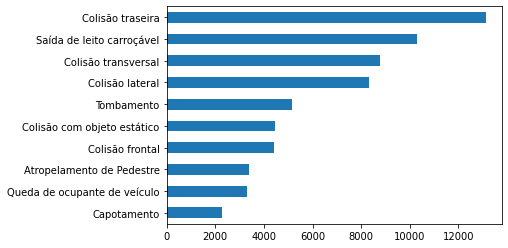

In [186]:
# Visualizando graficamente as categorias de tipos de acidentes mais frequentes
df.tipo_acidente.value_counts().iloc[:10].sort_values().plot(kind="barh")

In [187]:
# Identificando o número de mortos, feridos e ilesos por meio do agrupamento: por tipo de acidente
## primeiro passamos os campos que deverão ser listados/processados, depois os campos que serão utlizados para fazer o agrupamento dos dados
lista_agrupamento_acidente = df[['mortos',	'feridos_leves',	'feridos_graves',	'ilesos']].groupby([df['tipo_acidente']])
lista_agrupamento_acidente.sum()
# Embora Colisão Fontral seja apenas a sétima em número de acidentes, ela provoca o maior número de mortes e feridos

,mortos,feridos_leves,feridos_graves,ilesos
tipo_acidente,,,,
Atropelamento de Animal,94,928,333,777
Atropelamento de Pedestre,955,1734,1510,2746
Capotamento,119,2528,505,1200
Colisão com objeto em movimento,21,231,77,335
Colisão com objeto estático,284,3367,908,2799
Colisão frontal,1595,4658,3175,5160
Colisão lateral,305,7539,1921,11730
Colisão transversal,447,8491,2945,10753
Colisão traseira,632,12013,2936,20451


**Acidentes por Tipo de Pista**

---




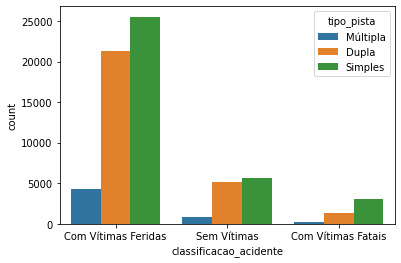

In [180]:
# Visualizando graficamente o número de acidentes por tipo de pista nas rodovias federais
# Quanto maior o número de pistas, menor foi o registro de vítimas
sns.countplot(x='classificacao_acidente',data=df, hue='tipo_pista')

**Mortalidade por Dia da Semana**

---




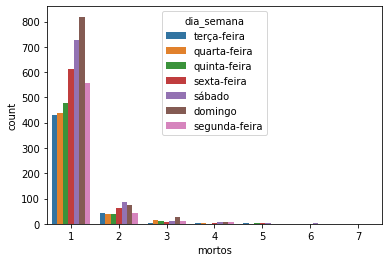

In [197]:
# Visualizando graficamente o registro de mortos relacionado a acidentes em rodovias por dia da semana
# O maior número de mortes foi registrado no domingo, a maioria dos acidentes com vítimas fatais tem 1 morte relacionada.
sns.countplot(x='mortos', data=mortos, hue='dia_semana')

**Mortalidade por Condição Meteorológica**

---




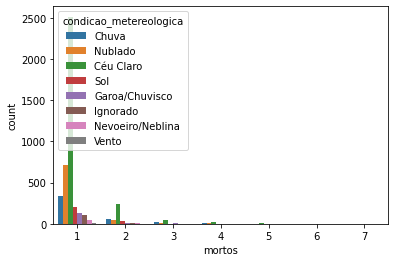

In [198]:
# Visualizando graficamente o registro de mortos relacionado a acidentes em rodovias por condição meteorológica
# O maior número de mortes foi registrado em condições de céu claro, a maioria dos acidentes com vítimas fatais tem 1 morte relacionada.
sns.countplot(x='mortos',data=mortos, hue='condicao_metereologica')

## **3. Analisando Localidades**




**Vítimas por Estado e Cidade**

---




In [175]:
# Identificando o número de mortos, feridos e ilesos por meio do agrupamento: por estado e por cidade
## primeiro passamos os campos que deverão ser listados/processados, depois os campos que serão utlizados para fazer o agrupamento dos dados
lista_agrupamento = df[['mortos',	'feridos_leves',	'feridos_graves',	'ilesos']].groupby([df['UF'], df['municipio']])
lista_agrupamento.sum()

mortos  feridos_leves  feridos_graves  ilesos
UF municipio                                                            
AC ACRELANDIA                   0              1               0       0
   ASSIS BRASIL                 0              0               0       3
   BRASILEIA                    9              6               5       0
   BUJARI                       0             15               6      11
   CAPIXABA                     0             18              10       9
...                           ...            ...             ...     ...
TO SAO BENTO DO TOCANTINS       0              3               0       5
   TALISMA                      0             12               2      20
   TUPIRAMA                     2              5               2       4
   WANDERLANDIA                 3             10               4      12
   XAMBIOA                      1              1               0       2

[1803 rows x 4 columns]

In [176]:
# Verificando a quantidade de registros referentes às causas de acidentes de trânsito nas rodovias federais
## Falta de Atenção se destaca amplamente como o principal fator de acidente nas estradas
df['UF'].value_counts()

MG    8720
SC    8428
PR    7708
RJ    4606
RS    4595
SP    4377
BA    3471
GO    3354
ES    2842
PE    2736
MT    2137
CE    1694
PB    1564
RO    1533
RN    1437
MS    1435
PI    1346
DF    1090
MA    1075
PA     817
AL     629
SE     612
TO     520
AC     254
RR     237
AP     128
AM     101
Name: UF, dtype: int64

In [177]:
# Selecionando dados dos Estados Mais Perigosos: MG, SC e PR
# Criando o filtro para MG
df_mask_mg = df['UF']=='MG'
filtro_mg_df = df[df_mask_mg]

# Criando o filtro para SC
df_mask_sc = df['UF']=='SC'
filtro_sc_df = df[df_mask_sc]

# Criando o filtro para PR
df_mask_pr = df['UF']=='PR'
filtro_pr_df = df[df_mask_pr]

# Concatenando as linhas em uma só tabela/DataFrame com a função concat()
estados_perigosos = pd.concat([filtro_mg_df, filtro_sc_df, filtro_pr_df])
## Exibindo a lista com dados dos Estados MG, SC e PR
estados_perigosos.head()

,dia_semana,hora,UF,br,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,dia,mes,ano
4,terça-feira,1,MG,381,NOVA ERA,Falta de Atenção à Condução,Colisão transversal,Com Vítimas Feridas,Plena Noite,Nublado,Simples,Interseção de vias,Não,2,0,0,1,1,0,1,2,-19.76090,-43.03060,1,1,2019
10,terça-feira,2,MG,50,UBERLANDIA,Desobediência às normas de trânsito pelo condutor,Colisão frontal,Com Vítimas Feridas,Plena Noite,Chuva,Dupla,Interseção de vias,Não,3,0,0,2,1,0,2,2,-18.94440,-48.21850,1,1,2019
13,terça-feira,3,MG,381,BETIM,Velocidade Incompatível,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Nublado,Dupla,Não Informado,Sim,1,0,1,0,0,0,1,1,-19.95720,-44.12430,1,1,2019
19,terça-feira,4,MG,459,IPUIUNA,Falta de Atenção à Condução,Atropelamento de Pedestre,Com Vítimas Fatais,Plena Noite,Nublado,Simples,Reta,Não,3,1,0,0,1,1,0,1,-22.07954,-46.24275,1,1,2019
23,terça-feira,6,MG,40,SETE LAGOAS,Pista Escorregadia,Saída de leito carroçável,Com Vítimas Feridas,Amanhecer,Chuva,Dupla,Reta,Não,2,0,1,0,1,0,1,1,-19.45930,-44.30330,1,1,2019


**Acidentes por Estado e Traçado da Via**

---




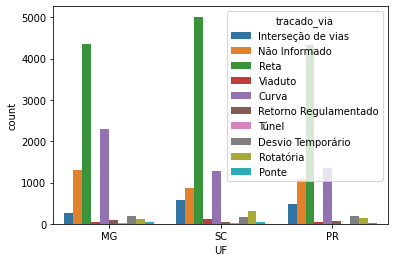

In [178]:
# Visualizando graficamente o número de acidentes por tipo de traçado da via nos Estados mais perigosos: MG, SC e PR
# O seaborn é uma bibliteca que permite construir gráficos rapidamente 
# No caso abaixo, é nítido que nos Estados mais perigosos o maior número de acidentes aconteceu em "Retas"
import seaborn as sns
sns.countplot(x='UF',data=estados_perigosos, hue='tracado_via')

**Causas de Acidentes por Estado e Condição Meteorológica**

---




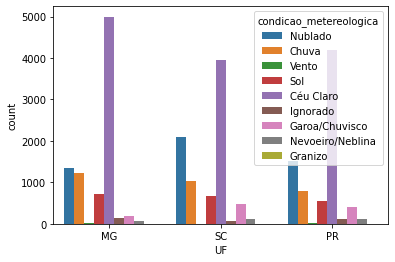

In [179]:
# Visualizando graficamente o número de acidentes por tipo de traçado da via nos Estados mais perigosos: MG, SC e PR
# No caso abaixo, nos Estados mais perigosos o maior número de acidentes aconteceu sob condições de "Céu Claro"
sns.countplot(x='UF',data=estados_perigosos, hue='condicao_metereologica')

**Acidentes por Município**

---




In [181]:
# Verificando as cidades com maior número de acidentes
localidades = df.groupby("municipio").size().sort_values(ascending = False)[:15]
localidades

municipio
CURITIBA                1094
BRASILIA                1090
SAO JOSE                 819
GUARULHOS                717
SERRA                    633
PALHOCA                  606
DUQUE DE CAXIAS          568
BETIM                    526
TERESINA                 471
PORTO VELHO              447
RECIFE                   428
UBERLANDIA               426
CARIACICA                424
MARINGA                  416
SAO JOSE DOS PINHAIS     395
dtype: int64

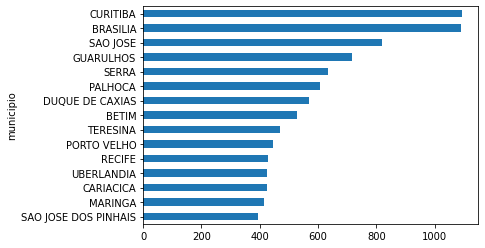

In [182]:
# Gráfico de Barras Horizontal
# Visualizando graficamente as categorias de crimes mais frequente
localidades.sort_values().plot(kind = "barh")

## **4. Análise Temporal**

Verificação dos dias, meses e horários com maior índice de ocorrências relacionadas a acidentes rodoviários.



In [173]:
# Verificando os dias da semana em que ocorreram o maior número de acidentes
## Agrupando dados de acidente por dia da semana pode ser efetudo pela função value_counts() ou por agrupamento, função groupby()
## O domingo apresentou o maior número de registros
df.groupby("dia_semana").size().sort_values(ascending = False)

dia_semana
domingo          11298
sábado           11099
sexta-feira      10381
segunda-feira     9134
quinta-feira      8755
terça-feira       8405
quarta-feira      8374
dtype: int64

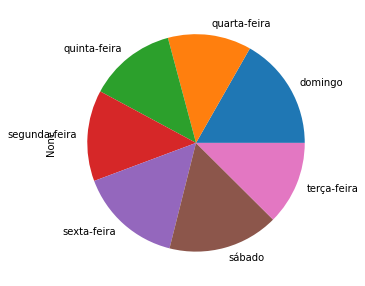

In [174]:
# Exibindo graficamente os dias da semana e os respectivos registros de acidentes ocorridos (Gráfico tipo Pizza)
pizza = df.groupby("dia_semana").size()
pizza.plot.pie(y=pizza, figsize=(5, 5))

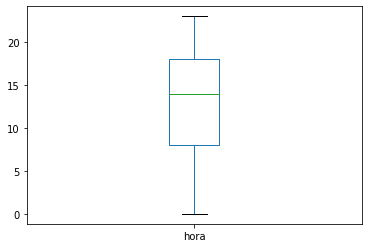

In [184]:
# O gráfico BoxPlot nos ajudada a identificar os horários com maior número de acidentes:
# 25% dos acidentes ocorreram antes das 8h-9h (aproximadamente)
# 50% dos acidentes ocorreram até às 14h (aproximadamente)
# 75% dos acidentes ocorreram até às 18h-19h (aproximadamente) 
## Na parte da manhã e início da tarde os acidentes ocorrem de forma mas espaçada
## Na parte final da tarde e início da noite os acidentes acontecem de forma mais concentrada
df['hora'].plot.box()

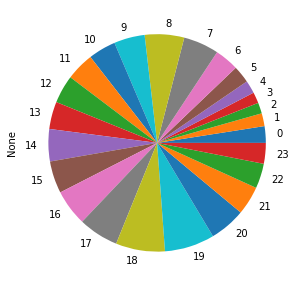

In [183]:
# Verificando graficamente os horários com maior ocorrência de acidentes
# Exibindo o resultado dos crimes por dia da semana de forma gráfica (Pizza)
pizza = df.groupby("hora").size()
pizza.plot.pie(y=pizza.sort_values(ascending=False), figsize=(5, 5))

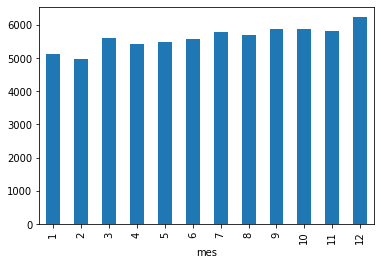

In [189]:
# Visualizando ocorrências de crimes de Furto ao longo dos meses
df.groupby("mes").size().plot(kind = "bar")

Observa-se que os meses de **Julho** e **Agosto** registraram maior número de ocorrências relacionadas a furtos.

O mês de **Fevereiro** foi o mais "tranquilo" (isso não indica que seja uma regra).

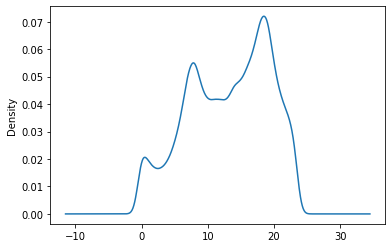

In [190]:
# Visualizando ocorrências de acidentes ao longo de 24 horas
#df.groupby("hora").size().plot(kind = "bar")
#df['hora'].plot.hist(alpha=0.5,bins=50)
df['hora'].plot.kde()

Observa-se que entre **3h e 5h** da manhã são os horários mais "tranquilos".

Entre **12h até 18h** são os horários com maior registro de furtos.

<<Para confirmar a informação abaixo precisaremos fazer uma análise dos crimes de furto nestas duas ruas, filtrando por mês e também por horário. Embora elas tenham o maior registro, talvez especificamente nestas ruas os crimes estejam ocorrendo mais em outros meses e horários>>
Com essas 2 linhas de código conseguimos descobrir que não é uma boa ideia ficar nas ruas **BOYLSTON** e **WASHINGTON** no período de **12 até 18h** nos meses de **Julho** e **Agosto**.

Com essas informações é possível identificar as localidades onde é necessário maior presença de policiamento, quais os horários e meses mais críticos, obtendo assim uma otimização na alocação das viaturas policiais. **(apenas um exemplo)**

In [191]:
# Agrupamento de acidentes de trânsito em rodovias federais agrupados por Mês e Hora
#ocorrencias_mes_hora = df[df.ano==2019].groupby(['mes','hora']).size()
ocorrencias_mes_hora = df.groupby(['mes','hora']).size()
ocorrencias_mes_hora

mes  hora
1    0       131
     1        96
     2        79
     3        78
     4        89
            ... 
12   19      386
     20      357
     21      302
     22      217
     23      192
Length: 288, dtype: int64

O código acima utilizou dados apenas do ano de 2018, que foram agrupados por mês e hora (**MONTH** e **HOUR**), a contabilização é obtida por meio da função **size()**.

Com isso temos a contagem das ocorrências de furtos por hora, com os dados agrupados por mês.

Ou seja, sabemos sobre cada furto dentro de cada hora de cada mês.

In [192]:
# Facilitando a visualizacao dos dados usando unstack (traducao -> desempilhar)
ocorrencias_mes_hora.unstack(0)

mes,1,2,3,4,5,6,7,8,9,10,11,12
hora,,,,,,,,,,,,
0,131,140,140,131,133,127,131,127,164,141,137,166
1,96,88,116,104,120,97,100,88,132,103,120,127
2,79,90,84,96,92,94,73,83,91,85,97,124
3,78,84,98,85,92,119,81,94,91,92,84,108
4,89,89,96,102,124,110,111,109,111,105,111,136
5,108,127,172,133,124,169,136,132,156,161,143,176
6,189,190,163,184,216,202,202,189,217,214,212,230
7,239,248,277,278,291,298,337,305,322,306,343,313
8,299,289,306,308,326,312,381,352,367,349,336,328


In [193]:
# Verificando o mês e horário com maior registro de ocorrências relacionadas a acidentes em rodovias federais:
# Mês de Maio, 18h00
ocorrencias_mes_hora.idxmax()

(5, 18)

In [194]:
# Verificando o mês e horário com menor registro de ocorrências relacionadas a acidentes em rodovias federais:
# Mês de Julho, 02h00
ocorrencias_mes_hora.idxmin()

(7, 2)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f67939072b0>,
      dtype=object)

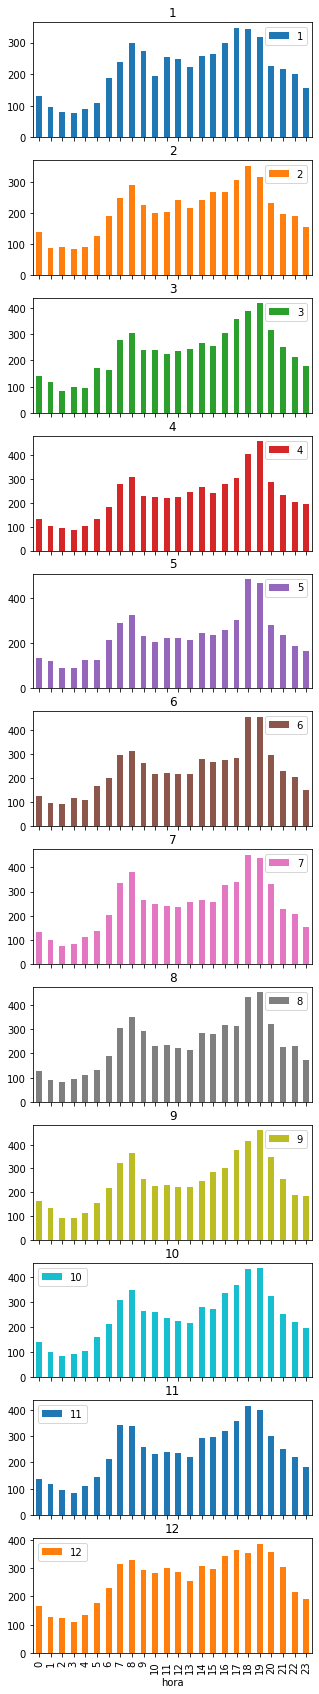

In [195]:
# Visualizando essas informacoes de modo gráfico
ocorrencias_mes_hora.unstack(0).plot(subplots=True, kind="bar", figsize=(5, 30))

In [196]:
# Analisando os registros de mortalidade nos acidentes em rodovias federais
# A bilioteca matplotlib.pyplot é uma ferramenta de geração de gráficos simples e útil.
import matplotlib.pyplot as plt
## Primeiro, selecionamos apenas dados que contém o registro de uma ou mais mortes relacionadas às ocorrências de acidentes
mortos = df[(df['mortos']>0)]

# Exibindo alguns resultados (5)
print(mortos.head())
# Apresentando a quantidade de linhas e colunas: 4.592 ocorrências de acidentes registraram uma ou mais mortes
print('Registros: ', mortos.shape)

     dia_semana  hora  UF   br  ...  longitude dia mes   ano
8   terça-feira     2  GO   60  ... -49.407600   1   1  2019
16  terça-feira     3  PB  230  ... -38.515900   1   1  2019
17  terça-feira     4  RN  304  ... -35.489544   1   1  2019
19  terça-feira     4  MG  459  ... -46.242750   1   1  2019
20  terça-feira     4  RJ  101  ... -44.322030   1   1  2019

[5 rows x 26 columns]
Registros:  (4592, 26)


## **4. Correlação entre Variávies**

Verificação da existência de correlação linear entre as variávies.



Text(0.5, 1.0, 'Correlação entre Colunas')

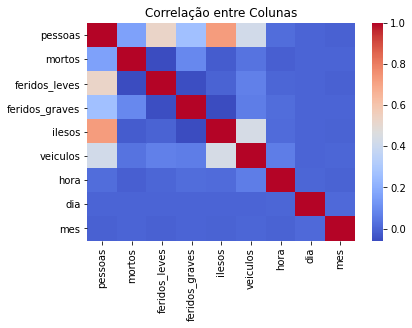

In [199]:
# Identificando a correlação entre os diversos campos da base de dados
# Primeiramente, criamos uma lista das colunas que queremos verificar a correlação
colunas_correlacao = df[['pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos', 'veiculos', 'hora','dia', 'mes']]
# O passo seguinte é gerar o gráfico de correlação, quanto mais próximo da cor vermelha, maior a relação entre duas variáveis. A tonalidade azul indica que as variáveis não apresentam correlaçaõ linear.
sns.heatmap(colunas_correlacao.corr(),cmap='coolwarm')
plt.title('Correlação entre Colunas')
# No caso abaixo, a coluna "pessoas" está melhor correlacionada às variáveis/campos: "feridos_leves" e "ilesos".

In [200]:
# O cálculo da matriz de correlação é obtido pelo comando abaixo.
# Abaixo a representação numérica do gráfico apresentado anteriormente: quanto mais próximo de 1, maior o nível de correlação entre variáveis.
correlacao = colunas_correlacao.corr()
# Exibindo os resultados
correlacao

,pessoas,mortos,feridos_leves,feridos_graves,ilesos,veiculos,hora,dia,mes
pessoas,1.000000,0.163523,0.532367,0.266335,0.727698,0.422014,0.021444,0.000869,-0.005232
mortos,0.163523,1.000000,-0.058207,0.092216,-0.016988,0.039873,-0.010760,0.002781,0.002072
feridos_leves,0.532367,-0.058207,1.000000,-0.051631,-0.002240,0.072029,0.004892,0.000584,-0.007635
feridos_graves,0.266335,0.092216,-0.051631,1.000000,-0.054733,0.064686,0.021399,0.002298,0.001993
ilesos,0.727698,-0.016988,-0.002240,-0.054733,1.000000,0.439400,0.016364,0.000708,-0.004349
veiculos,0.422014,0.039873,0.072029,0.064686,0.439400,1.000000,0.061779,0.001072,0.004193
hora,0.021444,-0.010760,0.004892,0.021399,0.016364,0.061779,1.000000,0.007890,-0.003633
dia,0.000869,0.002781,0.000584,0.002298,0.000708,0.001072,0.007890,1.000000,0.014219
mes,-0.005232,0.002072,-0.007635,0.001993,-0.004349,0.004193,-0.003633,0.014219,1.000000


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:132: UserWarning: The handle <matplotlib.patches.Patch object at 0x7f6799a06748> has a label of '_nolegend_' which cannot be automatically added to the legend.
  figlegend = self.fig.legend(handles, labels, **kwargs)


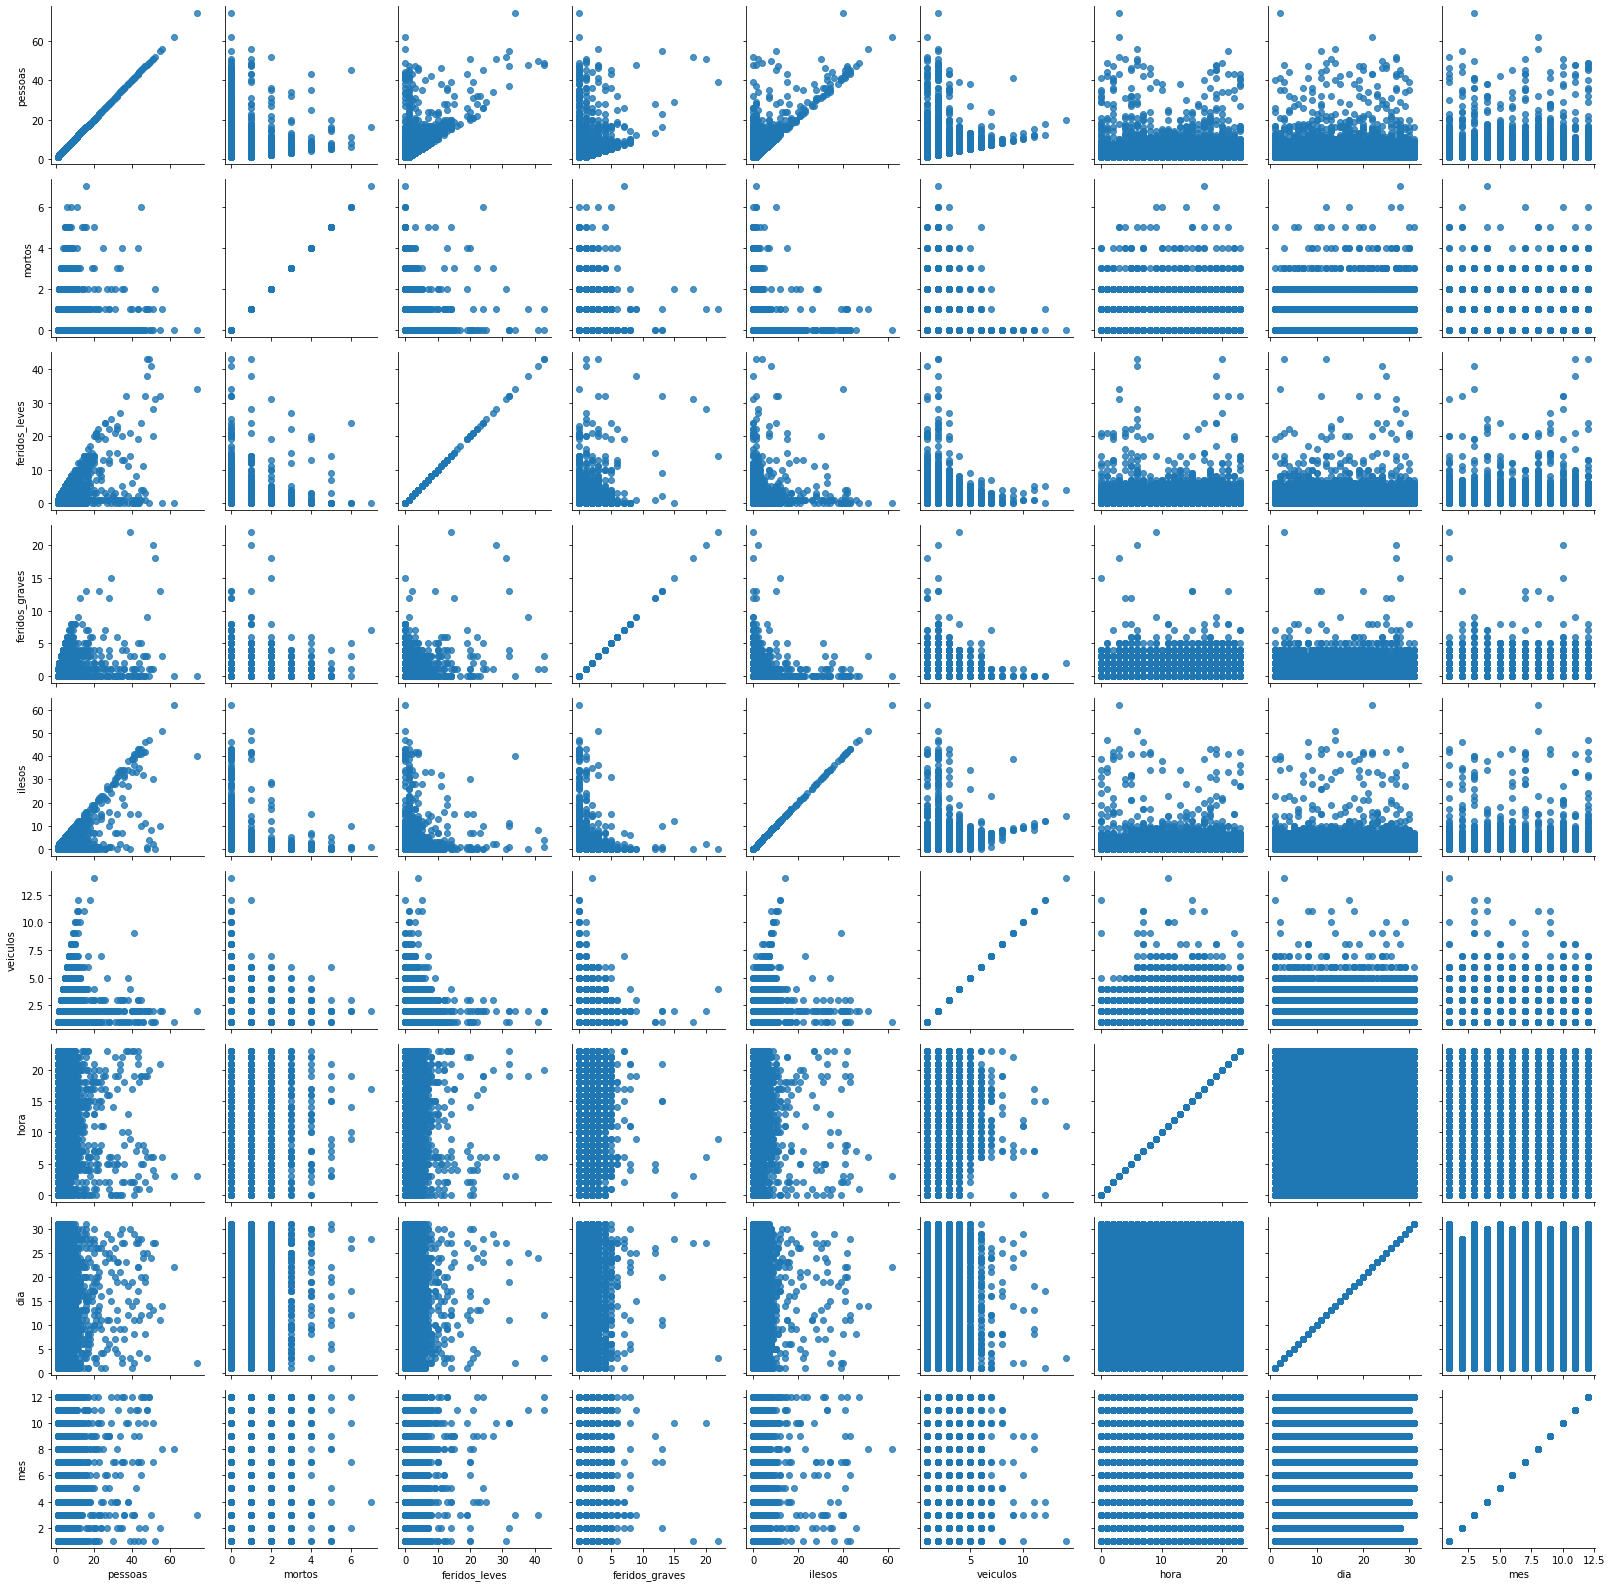

In [201]:
# Análise gráfica da correlação
# A partir do gráfico abaixo, evidencia-se uma dificuldade em se estabelecer uma relação linear entre as variáveis
# Um boa análise dos gráficos abaixo pode auxiliar na escolha do modelo preditivo (machine learning) mais adequado às características dos dados
g = sns.PairGrid(colunas_correlacao, palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

ATIVIDADES EXTRA

## **5. Mapas: Visualizando Locais de Ocorrências de Acidentes em Rodovias Federais**


---


In [202]:
# Importação de uma biblitoca para efetuar a leitura dos dados geográficos disponbilizados na base de dados, campos latitude e longitude.
import folium
from folium import plugins

In [203]:
# Mapa de Calor de Ocorrência de Acidentes em Rodovias Federais
pontos = (df['latitude'].fillna(0),df['longitude'].fillna(0))
coordenadas =[]
# Definindo lat and long 
lat = pontos[0]
long = pontos[1]
# Latitude e longitude da Cidade de Boston
mapa = folium.Map(location=[-15.10, -50.08], zoom_start=4,width=600, height=550,)
# Adicionando as coordenadas
for la,lo in zip(lat,long):
    coordenadas.append([la,lo])
   
# Limitando o número de pontos a serem exibidos
mapa.add_child(plugins.HeatMap(coordenadas[0:40000]))

In [204]:
# Marcadores com Pontos de Criminalidades de Boston
mapa2 = folium.Map(location=[-15.10, -50.08], zoom_start=4,width=600, height=550)
for la,lo in zip(lat[0:1000],long[0:1000]):
    folium.Marker(
        location=[la,lo],
        icon=folium.Icon(icon_color='white')
    ).add_to(mapa2)
# Plotting 
mapa2

Os mapas acima indicam que os acidentes estão distribuídos majoritriamente nas regiões com maior concentração de população e malhas viárias, havendo menor volume de acidentes na região Norte do país.

---



ATIVIDADES EXTRA

##**DESAFIO**##
## **6. Predição: Uso do Machine Learning para Estimar Mortes Relacionadas a Acidentes em Rodovias Federais**

Aplicação de algoritimos de Regressão Linear e Agrupamento para estimar e classificar ocorrências com vítimas fatais em rodovias federais.


---



